In [1]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import praw
import matplotlib.pyplot as plt
import math
import datetime as dt
import pandas as pd
import numpy as np


In [2]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jacks\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jacks\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
reddit = praw.Reddit(
    client_id="VDKJ3wny9uRs-x37_mwxOA",
    client_secret="nL5FIo5h5cdGxI-PG1c5obdTHm_HwA",
    user_agent="my_scraper/0.1 by chemical_enjoyer"
)

In [14]:
def commentSentiment(ticker, urlT):
    subComments = []
    bodyComment = []
    try:
        check = reddit.submission(url=urlT)
        subComments = check.comments
    except:
        return 0
    
    for comment in subComments:
        try: 
            bodyComment.append(comment.body)
        except:
            return 0
    
    sia = SIA()
    results = []
    for line in bodyComment:
        scores = sia.polarity_scores(line)
        scores['headline'] = line

        results.append(scores)
    
    df =pd.DataFrame.from_records(results)
    df.head()
    df['label'] = 0
    
    try:
        df.loc[df['compound'] > 0.1, 'label'] = 1
        df.loc[df['compound'] < -0.1, 'label'] = -1
    except:
        return 0
    
    averageScore = 0
    position = 0
    while position < len(df.label)-1:
        averageScore = averageScore + df.label[position]
        position += 1
    averageScore = averageScore/len(df.label) 
    
    return(averageScore)


In [15]:
def latestComment(ticker, urlT):
    subComments = []
    updateDates = []
    try:
        check = reddit.submission(url=urlT)
        subComments = check.comments
    except:
        return 0
    
    for comment in subComments:
        try: 
            updateDates.append(comment.created_utc)
        except:
            return 0
    
    updateDates.sort()
    return(updateDates[-1])


In [16]:
def get_date(date):
    return dt.datetime.fromtimestamp(date)


In [106]:
stocks = ["TSLA", "PLTR", "GME", "AMC", "NVDA", "AMD", "MSFT", "AAPL", "META"] 

In [107]:
submission_statistics = []
d = {}
for ticker in stocks:
    for submission in reddit.subreddit('wallstreetbets+investing+stocks').search(ticker, limit=500):
        # if submission.domain != "self.wallstreetbets":
        #     continue
        d = {}
        d['ticker'] = ticker
        d['num_comments'] = submission.num_comments
        d['comment_sentiment_average'] = commentSentiment(ticker, submission.url)
        if d['comment_sentiment_average'] == 0.000000:
            continue
        d['latest_comment_date'] = latestComment(ticker, submission.url)
        d['score'] = submission.score
        d['upvote_ratio'] = submission.upvote_ratio
        d['date'] = submission.created_utc
        d['domain'] = submission.domain
        d['num_crossposts'] = submission.num_crossposts
        d['author'] = submission.author
        submission_statistics.append(d)
    
dfSentimentStocks = pd.DataFrame(submission_statistics)

_timestampcreated = dfSentimentStocks["date"].apply(get_date)
dfSentimentStocks = dfSentimentStocks.assign(timestamp = _timestampcreated)

_timestampcomment = dfSentimentStocks["latest_comment_date"].apply(get_date)
dfSentimentStocks = dfSentimentStocks.assign(commentdate = _timestampcomment)

dfSentimentStocks.sort_values("latest_comment_date", axis = 0, ascending = True,inplace = True, na_position ='last') 

dfSentimentStocks

,ticker,num_comments,comment_sentiment_average,latest_comment_date,score,upvote_ratio,date,domain,num_crossposts,author,timestamp,commentdate
468,AAPL,318,0.203704,1.470800e+09,564,0.92,1.463401e+09,self.investing,0,timeforknowledge,2016-05-16 06:13:16,2016-08-09 21:38:14
462,AAPL,366,0.052632,1.471364e+09,597,0.89,1.471268e+09,self.investing,0,ArthurJMunoz,2016-08-15 07:35:11,2016-08-16 10:16:48
308,AMD,282,0.151515,1.486819e+09,744,0.90,1.486395e+09,self.wallstreetbets,0,Snutten,2017-02-06 08:31:03,2017-02-11 06:18:41
477,AAPL,314,-0.117647,1.497167e+09,439,0.93,1.497035e+09,self.investing,0,Azerty800,2017-06-09 12:57:45,2017-06-11 01:48:39
361,MSFT,314,-0.117647,1.497167e+09,443,0.93,1.497035e+09,self.investing,0,Azerty800,2017-06-09 12:57:45,2017-06-11 01:48:39
459,AAPL,276,0.102564,1.517572e+09,754,0.94,1.517510e+09,self.wallstreetbets,0,11thMoon,2018-02-01 11:37:47,2018-02-02 04:44:07
446,AAPL,232,0.200000,1.524531e+09,1252,0.96,1.524415e+09,self.wallstreetbets,0,lulzcakes,2018-04-22 10:32:20,2018-04-23 18:54:39
436,AAPL,407,0.175000,1.533165e+09,1055,0.95,1.533070e+09,self.investing,0,irishbball49,2018-07-31 14:41:08,2018-08-01 17:15:27
307,AMD,120,0.090909,1.540420e+09,1412,0.98,1.536786e+09,self.wallstreetbets,0,Blackwhiteasianand,2018-09-12 15:05:46,2018-10-24 16:23:49
374,MSFT,455,0.078818,1.540430e+09,158,0.97,1.540409e+09,self.wallstreetbets,0,Shauncore,2018-10-24 13:28:36,2018-10-24 19:16:25


In [89]:
dfSentimentStocks.author.value_counts()

author
jagyolo             7
thesmd1             4
potatoandbiscuit    3
farFocalPoint       2
vegaseller          2
                   ..
Honorjudge          1
bigpapa901          1
jacquesmioff        1
PutsOnYourWife      1
No_Smile821         1
Name: count, Length: 94, dtype: int64

In [108]:
dfSentimentStocks.to_csv('Reddit_Sentiment.csv', index=False) 

In [109]:
dfSentimentStocks = dfSentimentStocks.reset_index(drop=True)

In [114]:
df = pd.read_csv("Reddit_Sentiment.csv")

In [115]:
df

,ticker,num_comments,comment_sentiment_average,latest_comment_date,score,upvote_ratio,date,domain,num_crossposts,author,timestamp,commentdate
0,AAPL,318,0.203704,1.470800e+09,564,0.92,1.463401e+09,self.investing,0,timeforknowledge,2016-05-16 06:13:16,2016-08-09 21:38:14
1,AAPL,366,0.052632,1.471364e+09,597,0.89,1.471268e+09,self.investing,0,ArthurJMunoz,2016-08-15 07:35:11,2016-08-16 10:16:48
2,AMD,282,0.151515,1.486819e+09,744,0.90,1.486395e+09,self.wallstreetbets,0,Snutten,2017-02-06 08:31:03,2017-02-11 06:18:41
3,AAPL,314,-0.117647,1.497167e+09,439,0.93,1.497035e+09,self.investing,0,Azerty800,2017-06-09 12:57:45,2017-06-11 01:48:39
4,MSFT,314,-0.117647,1.497167e+09,443,0.93,1.497035e+09,self.investing,0,Azerty800,2017-06-09 12:57:45,2017-06-11 01:48:39
...,...,...,...,...,...,...,...,...,...,...,...,...
594,META,65,-0.133333,1.745638e+09,265,0.99,1.745524e+09,self.stocks,1,_hiddenscout,2025-04-24 13:41:47,2025-04-25 21:19:42
595,AMD,84,0.062500,1.745664e+09,31,0.79,1.745608e+09,reddit.com,0,AutisticKitty741,2025-04-25 13:06:33,2025-04-26 04:36:50
596,NVDA,231,0.194444,1.745675e+09,758,0.90,1.745224e+09,reddit.com,0,kawkface,2025-04-21 02:33:30,2025-04-26 07:40:39
597,AAPL,271,0.303030,1.745704e+09,1629,0.98,1.744056e+09,self.wallstreetbets,0,Conscious_Bad_4030,2025-04-07 14:07:14,2025-04-26 15:43:21


In [95]:
reddit_df = dfSentimentStocks.copy()

# Convert timestamps
reddit_df['date'] = pd.to_datetime(reddit_df['date'], unit='s')
reddit_df['latest_comment_date'] = pd.to_datetime(reddit_df['latest_comment_date'], unit='s')

# Group by date and ticker
daily_sentiment = reddit_df.groupby([reddit_df['date'].dt.date, 'ticker']).agg({
    'comment_sentiment_average': 'mean',
    'num_comments': 'sum',
    'score': 'mean',
    'upvote_ratio': 'mean'
}).reset_index()

# Now 'daily_sentiment' is ready to join with daily stock data
daily_sentiment.to_csv("tsla_pltr_daily_sentiment.csv",index=False)
daily_sentiment

,date,ticker,comment_sentiment_average,num_comments,score,upvote_ratio
0,2020-08-18,TSLA,0.063830,382,8884.00,0.96
1,2020-11-18,PLTR,0.350000,315,1453.00,0.96
2,2020-11-20,PLTR,0.200000,384,894.00,0.91
3,2020-11-25,PLTR,0.095172,1059,2154.75,0.97
4,2020-11-26,PLTR,0.259524,973,1449.00,0.96
...,...,...,...,...,...,...
91,2025-04-19,PLTR,0.421053,54,0.00,0.48
92,2025-04-20,TSLA,0.029851,167,360.00,0.89
93,2025-04-21,TSLA,0.205882,98,117.00,0.82
94,2025-04-22,TSLA,0.055556,35,0.00,0.15


In [97]:
import yfinance as yf

min_date = str(daily_sentiment['date'].min())[:-2] + '01'
max_date = str(daily_sentiment['date'].max())

tickers = list(daily_sentiment['ticker'].unique())
stock_data = yf.download(tickers, start=min_date, end=max_date, group_by='ticker')

# Now stock_data looks like:
# Top level: ticker (TSLA, PLTR)
# Second level: Open, High, Low, Close, etc.

# Initialize empty list to collect dataframes
frames = []

# Split and flatten each ticker
for ticker in tickers:
    df = stock_data[ticker].copy()
    df['ticker'] = ticker
    df['date'] = df.index
    frames.append(df)

# Concatenate into a clean DataFrame
stock_data = pd.concat(frames).reset_index(drop=True)

# Final formatting: reorder columns
stock_data = stock_data[['date', 'ticker', 'Open', 'High', 'Low', 'Close', 'Volume']]

# Save clean CSV
stock_data.to_csv('tsla_pltr_yfin_data_clean.csv', index=False)

# View
stock_data


[*********************100%***********************]  2 of 2 completed


Price,date,ticker,Open,High,Low,Close,Volume
0,2020-08-03,TSLA,96.613335,100.653999,96.292000,99.000000,132139500.0
1,2020-08-04,TSLA,99.667336,101.827332,97.466667,99.133331,126225000.0
2,2020-08-05,TSLA,99.532669,99.989334,97.887337,99.001335,74217000.0
3,2020-08-06,TSLA,99.388664,101.153999,98.484001,99.305336,89884500.0
4,2020-08-07,TSLA,99.969330,99.983330,94.334000,96.847336,133446000.0
...,...,...,...,...,...,...,...
2369,2025-04-16,PLTR,96.279999,97.300003,89.620003,92.709999,121997600.0
2370,2025-04-17,PLTR,94.709999,95.110001,92.269997,93.779999,83991800.0
2371,2025-04-21,PLTR,92.839996,96.474998,89.309998,90.800003,83831100.0
2372,2025-04-22,PLTR,93.014999,96.339996,91.349998,93.989998,91185400.0


In [98]:
# Make sure 'date' columns are datetime
daily_sentiment['date'] = pd.to_datetime(daily_sentiment['date'])
stock_data['date'] = pd.to_datetime(stock_data['date'])

# Merge on 'date' and 'ticker'
merged_df = pd.merge(daily_sentiment, stock_data, on=['date', 'ticker'], how='inner')

# Calculate daily percent return
merged_df['daily_return'] = (merged_df['Close'] - merged_df['Open']) / merged_df['Open']

# Optional: If you want sentiment to predict next day's move
# merged_df['next_day_return'] = merged_df.groupby('ticker')['daily_return'].shift(-1)

# View merged data
merged_df.to_csv('tsla_pltr_merged.csv',index=False)


In [112]:
pd.set_option('display.max_rows', 100)

In [104]:
merged_df.head()

,date,ticker,comment_sentiment_average,num_comments,score,upvote_ratio,Open,High,Low,Close,Volume,daily_return
0,2020-08-18,TSLA,0.063830,382,8884.00,0.960,126.599335,128.259995,123.007332,125.806000,247117500.0,-0.006267
1,2020-11-18,PLTR,0.350000,315,1453.00,0.960,18.280001,19.250000,17.540001,17.900000,89957900.0,-0.020788
2,2020-11-20,PLTR,0.200000,384,894.00,0.910,19.030001,19.660000,18.000000,18.150000,72104000.0,-0.046243
3,2020-11-25,PLTR,0.095172,1059,2154.75,0.970,23.959999,29.750000,23.690001,29.049999,202563700.0,0.212437
4,2020-11-27,PLTR,0.130388,317,2045.00,0.975,31.190001,33.500000,26.120001,27.660000,207834000.0,-0.113177


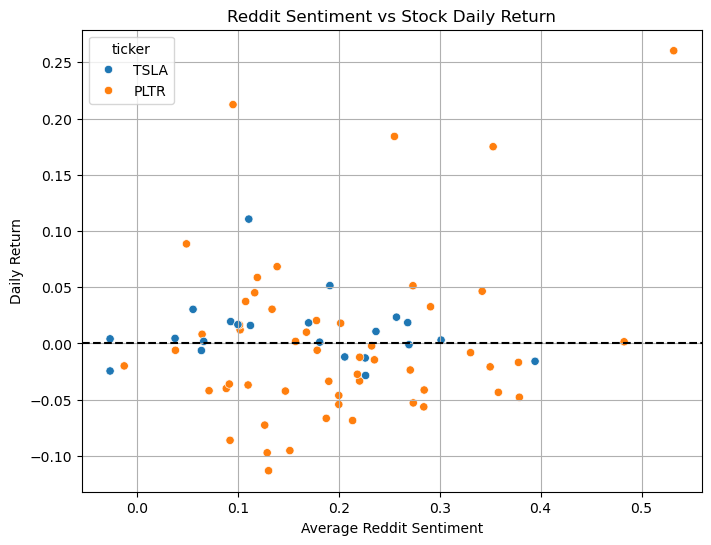

Correlation between sentiment and daily return: 0.1576


In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure 'date' is datetime
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='comment_sentiment_average', y='daily_return', hue='ticker', data=merged_df)
plt.title('Reddit Sentiment vs Stock Daily Return')
plt.xlabel('Average Reddit Sentiment')
plt.ylabel('Daily Return')
plt.axhline(0, color='black', linestyle='--')
plt.grid(True)
plt.show()

# Correlation
correlation = merged_df['comment_sentiment_average'].corr(merged_df['daily_return'])
print(f'Correlation between sentiment and daily return: {correlation:.4f}')
